In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(['PassengerId','Name','SibSp','Parch', 'Ticket', 'Cabin','Embarked'],axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
target = df.Survived
target[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
inputs = df.drop(['Survived'],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [6]:
dummies = pd.get_dummies(df.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [7]:
inputs = inputs.drop(['Sex'],axis='columns')

In [8]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [9]:
inputs.columns[inputs.isna().any()] # to check is there any column remain NaN value

Index(['Age'], dtype='object')

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [43]:
len(x_test)

179

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model = GaussianNB()

In [46]:
model.fit(x_train,y_train)

GaussianNB()

In [47]:
model.score(x_test,y_test)

0.8156424581005587

In [48]:
y_test[:10]

164    0
568    0
546    1
799    0
835    1
354    0
333    0
196    0
402    0
868    0
Name: Survived, dtype: int64

In [49]:
y_predict = model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

<AxesSubplot:>

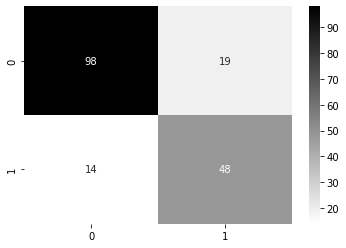

In [51]:
cm = confusion_matrix(y_test,y_predict)
sn.heatmap(cm,annot=True,cmap='binary')